In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()



,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Fighting,Misc,Platform.1,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,...,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000
mean,2007.413154,0.455006,0.272822,0.075695,0.096608,0.900252,71.693208,30.904762,7.254606,186.821233,...,0.056596,0.057963,0.062256,0.013856,0.076308,0.083724,0.121780,0.040788,0.163544,0.034738
std,4.112235,0.922152,0.663405,0.315609,0.282706,1.891634,13.118328,19.917532,1.373620,580.348260,...,0.231092,0.233695,0.241644,0.116906,0.265516,0.277000,0.327063,0.197819,0.369897,0.183135
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.080000,0.020000,0.000000,0.010000,0.150000,64.000000,16.000000,6.600000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.190000,0.080000,0.000000,0.030000,0.380000,74.000000,27.000000,7.600000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.470000,0.250000,0.020000,0.090000,0.920000,81.000000,42.000000,8.300000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


List down all count

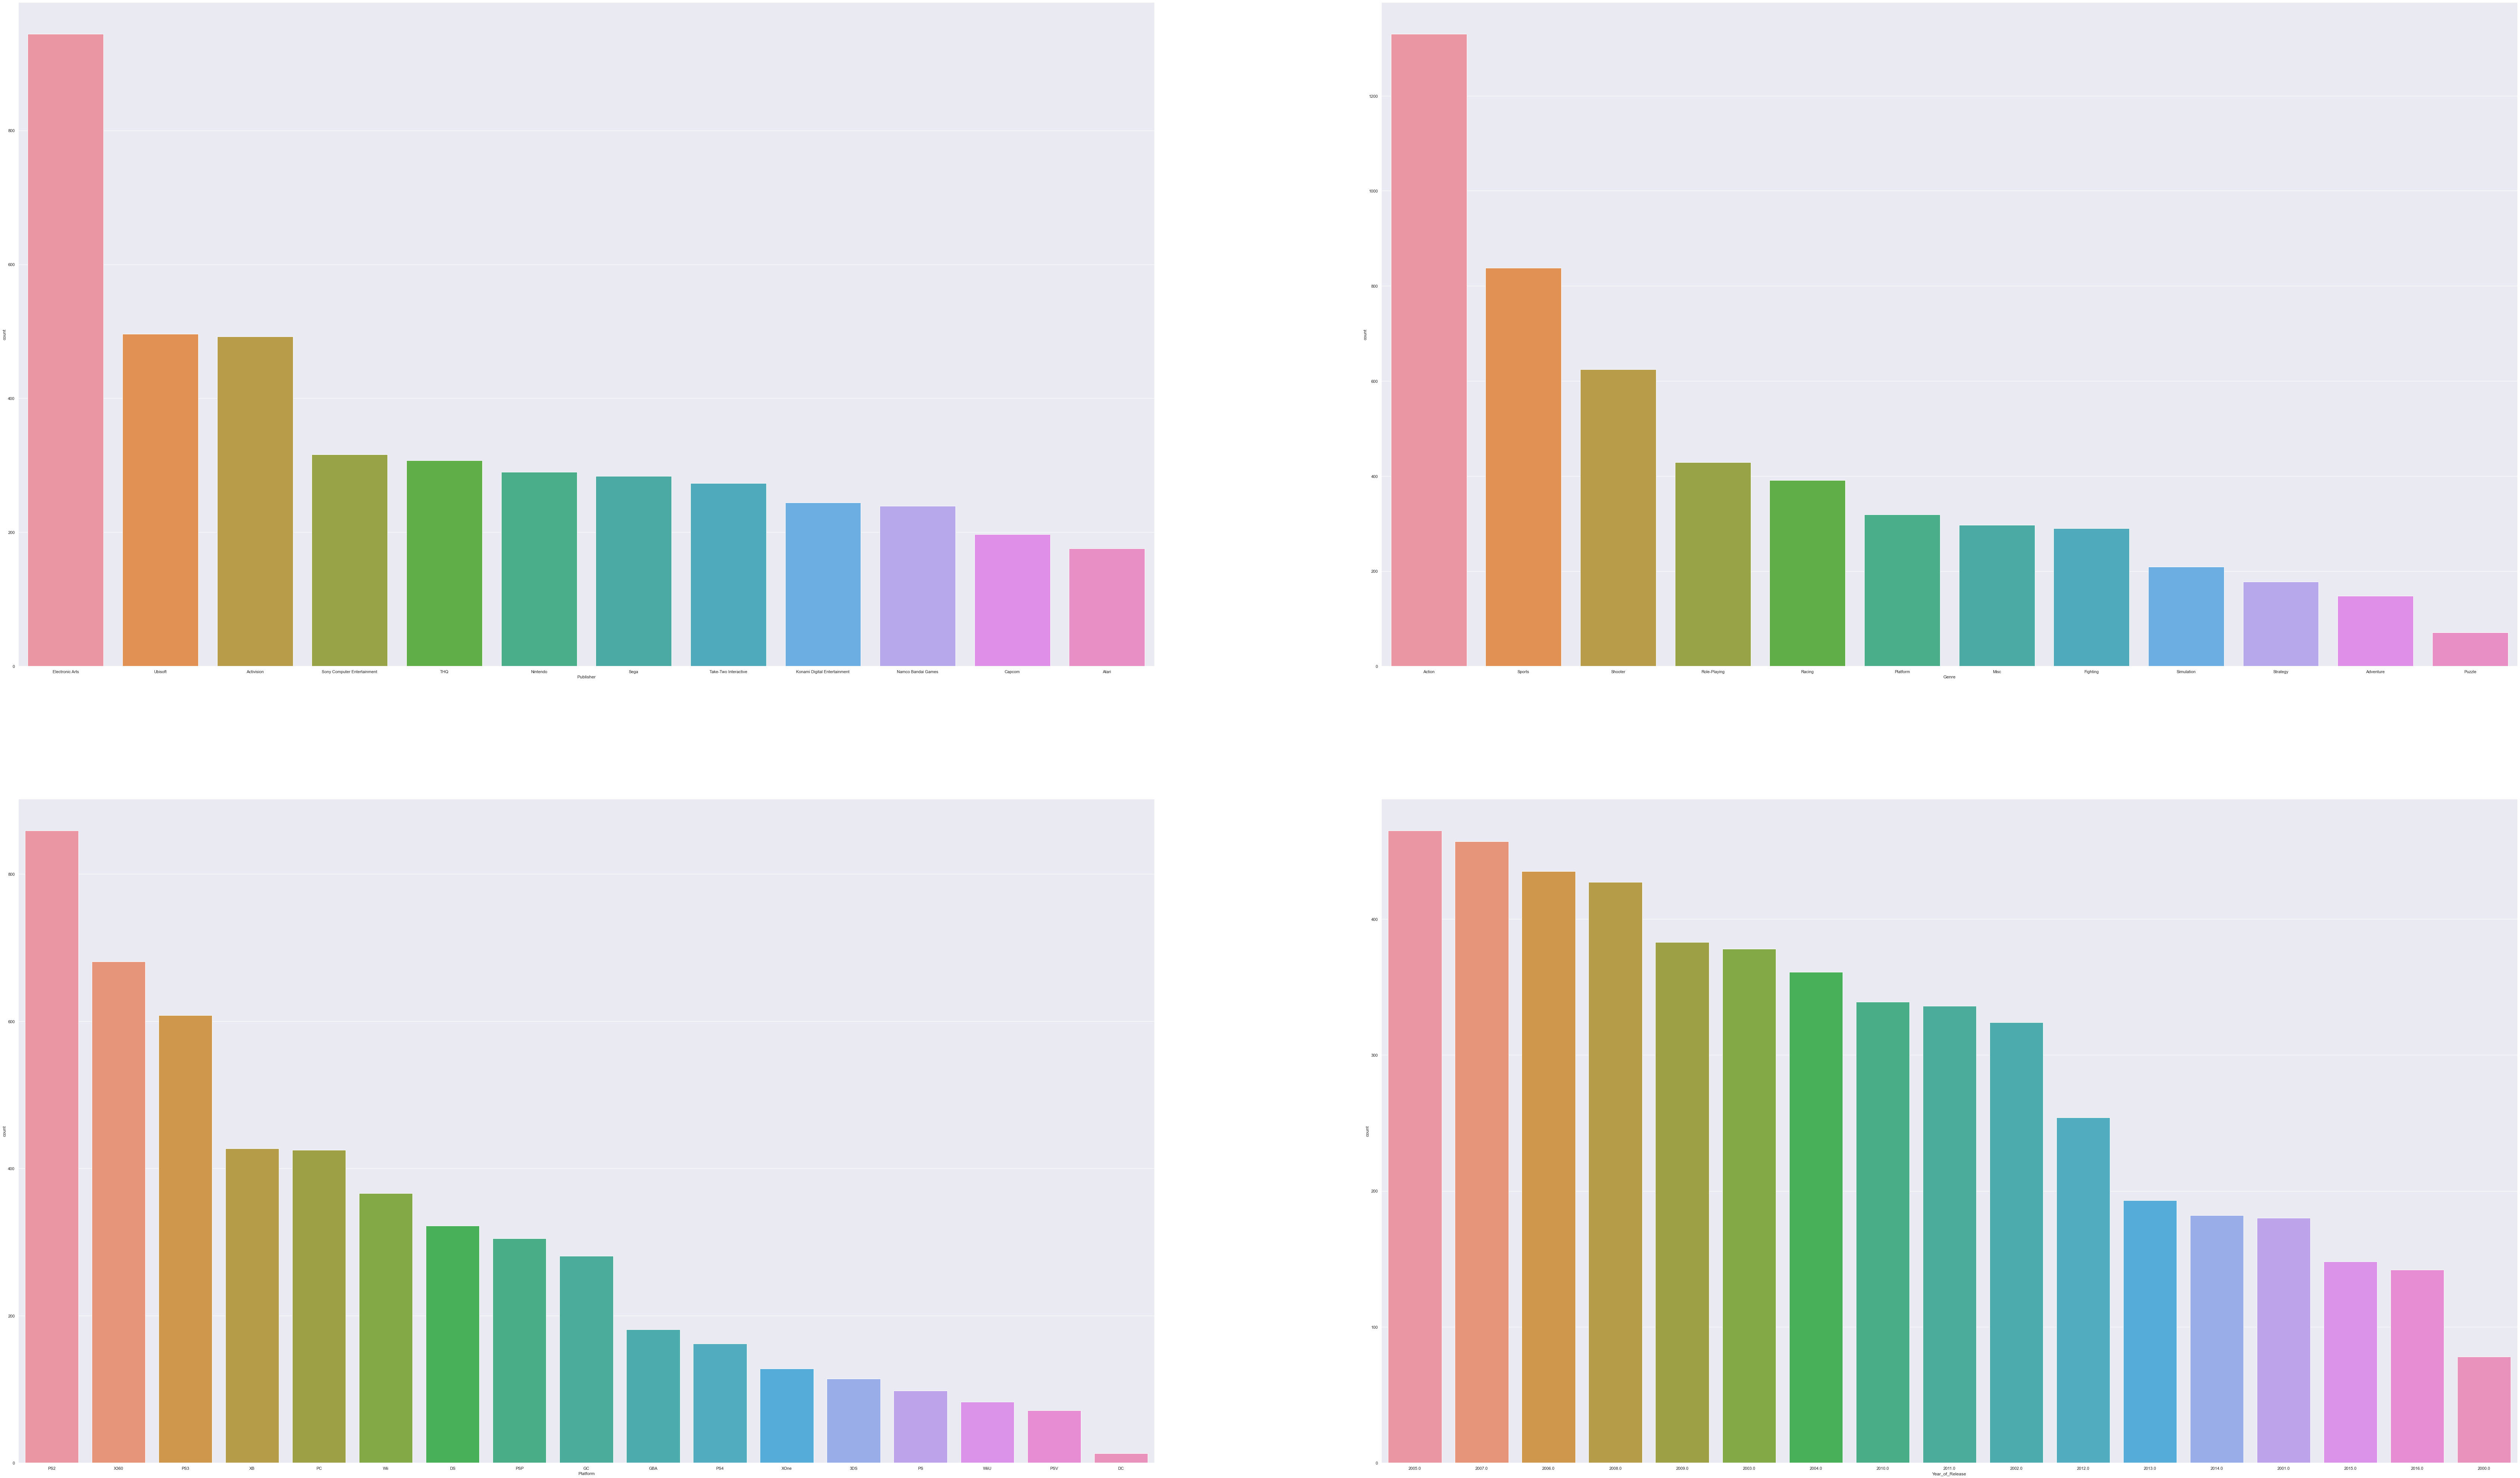

In [2]:
f, axes = plt.subplots(2,2,figsize=(120, 72))
ax = sb.countplot(x="Publisher", data=mainData, order=mainData.Publisher.value_counts().iloc[:12].index,ax=axes[0,0])
ax = sb.countplot(x="Genre", data=mainData, order=mainData.Genre.value_counts().iloc[:12].index,ax=axes[0,1])
ax = sb.countplot(x="Platform", data=mainData, order=mainData.Platform.value_counts().iloc[:17].index,ax=axes[1,0])
ax = sb.countplot(x="Year_of_Release", data=mainData, order=mainData.Year_of_Release.value_counts().iloc[:17].index,ax=axes[1,1])


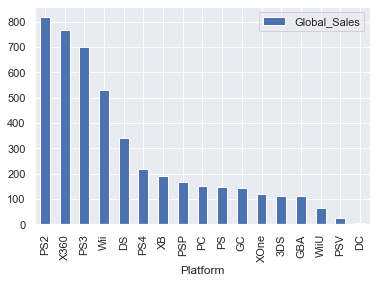

In [3]:
variables = mainData[['Platform','Genre','Publisher','Global_Sales']]
platform_group = variables.groupby('Platform')
# total 
platform_sales = platform_group.sum()
platform_sorted_desc= platform_sales.sort_values('Global_Sales',ascending=False)
my_plot = platform_sorted_desc.plot(kind='bar')
# average TBD

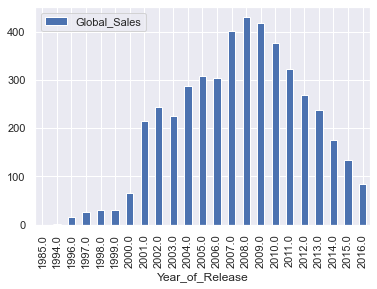

In [4]:
year = mainData[["Year_of_Release",'Global_Sales']]
year_group = year.groupby('Year_of_Release')
# total
year_sales = year_group.sum()
year_plot = year_sales.plot(kind='bar')

Total(top) and Average(below) Global_Sales for each Genre

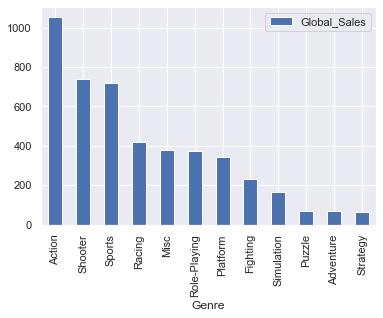

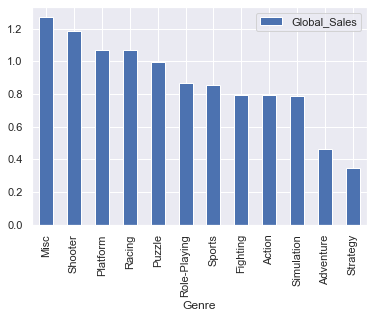

In [5]:
genre_group = variables.groupby('Genre')
# total
genre_sales = genre_group.sum()
genre_sorted_desc= genre_sales.sort_values('Global_Sales',ascending=False)
my_plot = genre_sorted_desc.plot(kind='bar')
# average
genre_sales = genre_group.agg('mean')
genre_sorted_desc= genre_sales.sort_values('Global_Sales',ascending=False)
my_plot = genre_sorted_desc.plot(kind='bar')

Total(top) and Average(below) Global_Sales for each Publisher

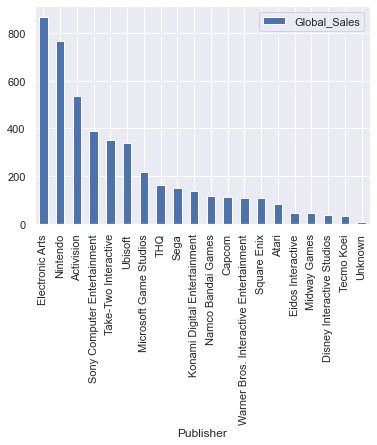

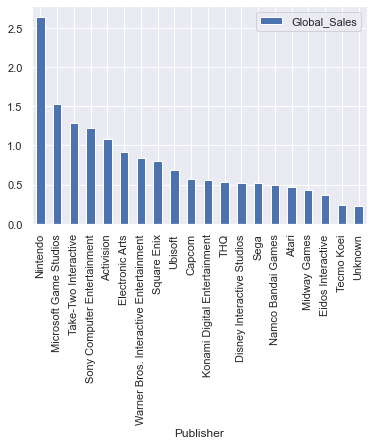

In [6]:

publisher_group = variables.groupby('Publisher')
# total
publisher_sales = publisher_group.sum()
publisher_sorted_desc= publisher_sales.sort_values('Global_Sales',ascending=False)
my_plot = publisher_sorted_desc.plot(kind='bar')
# average
publisher_sales = publisher_group.agg('mean')
publisher_sorted_desc= publisher_sales.sort_values('Global_Sales',ascending=False)
my_plot = publisher_sorted_desc.plot(kind='bar')


Comparison using Boxplot

Doesnt seem like Global Sales is affected by Critic Score and UserScore


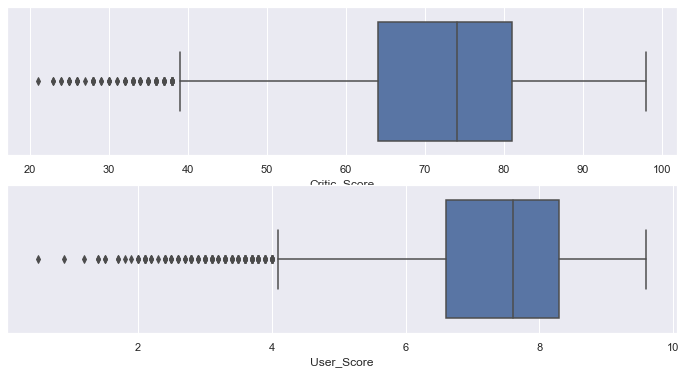

In [7]:
f, axes = plt.subplots(2,1,figsize=(12, 6))
ax = sb.boxplot(x='Critic_Score',data=mainData,orient='h',ax=axes[0])
ax = sb.boxplot(x='User_Score',data=mainData,orient='h',ax=axes[1])

Check relation of Critic score vs GlobalSales Depending on Critic score, there is a range of GlobalSales

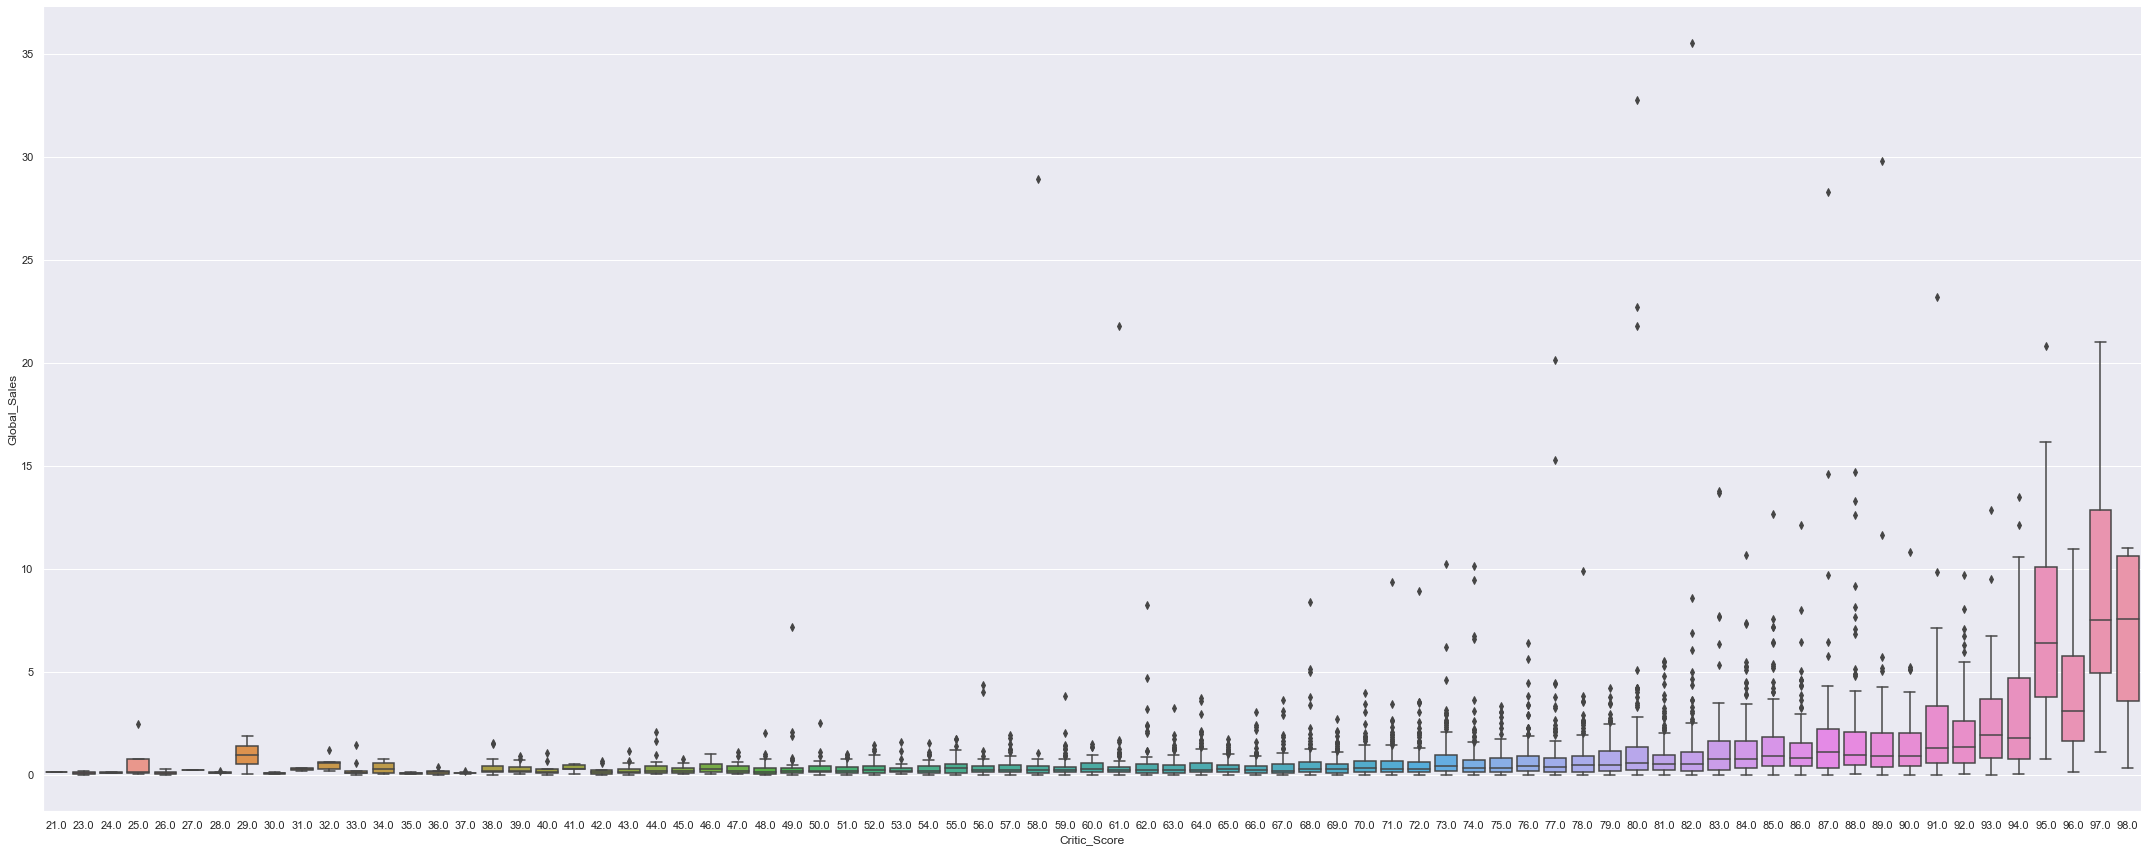

In [8]:
sb.catplot(x="Critic_Score", y="Global_Sales", kind="box",height=12, aspect= 2.5, data=mainData)

Check relation of Platform vs GlobalSales

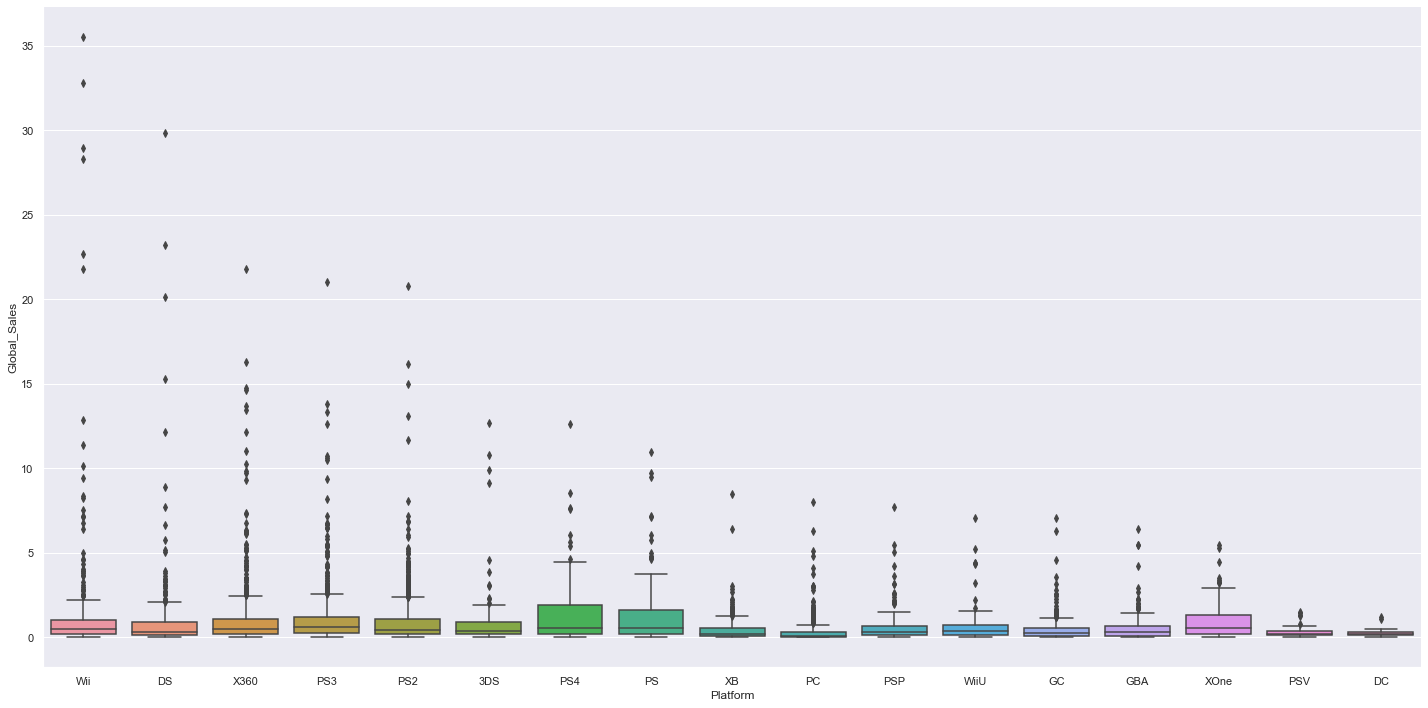

In [9]:
sb.catplot(x="Platform", y="Global_Sales", kind="box",height=10, aspect=2,data=mainData)

Check relation of Publisher vs GlobalSales

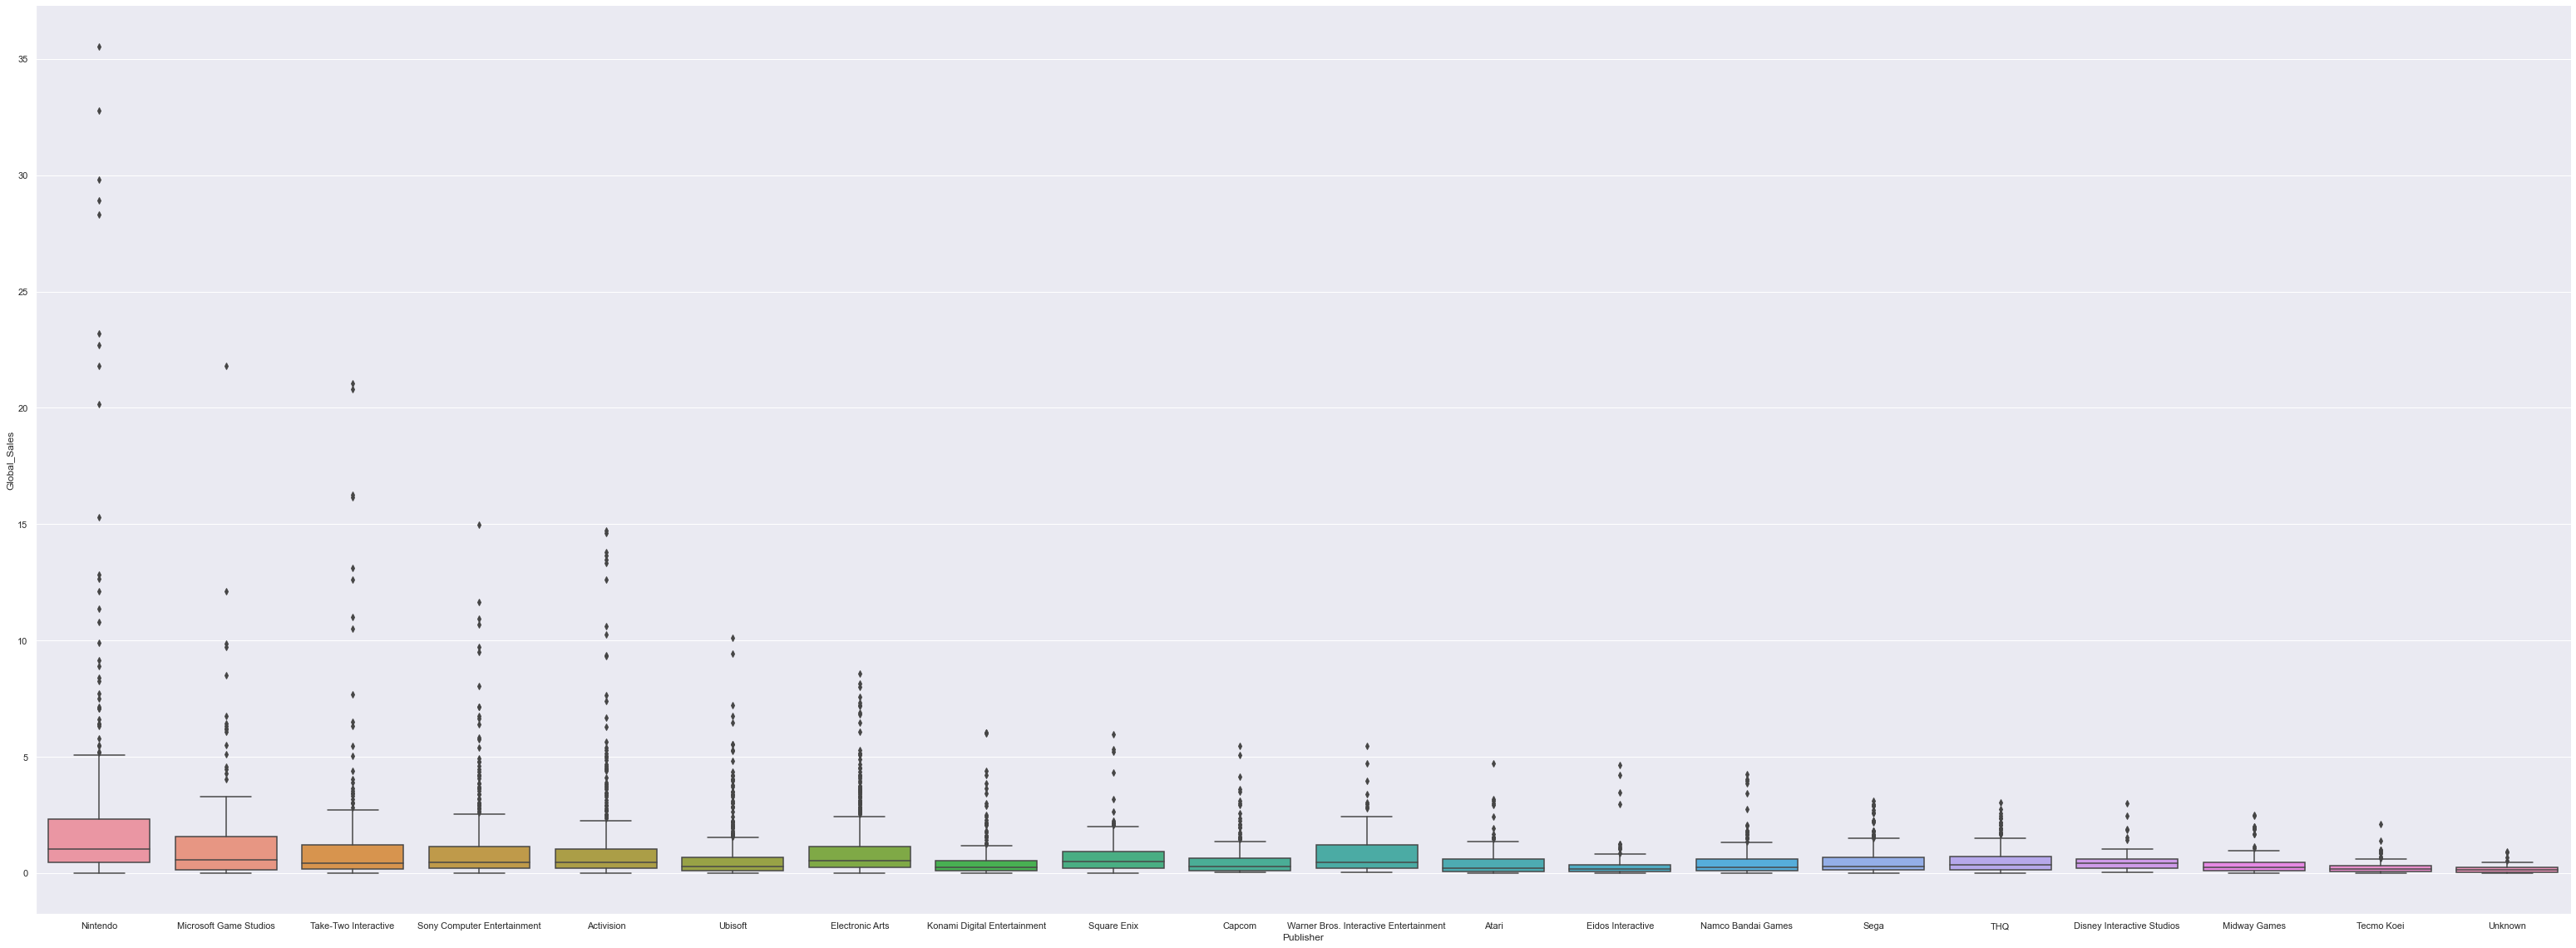

In [10]:
sb.catplot(x="Publisher", y="Global_Sales", kind="box",height=16, aspect=2.7,data=mainData)

Check relation of Genre vs GlobalSales

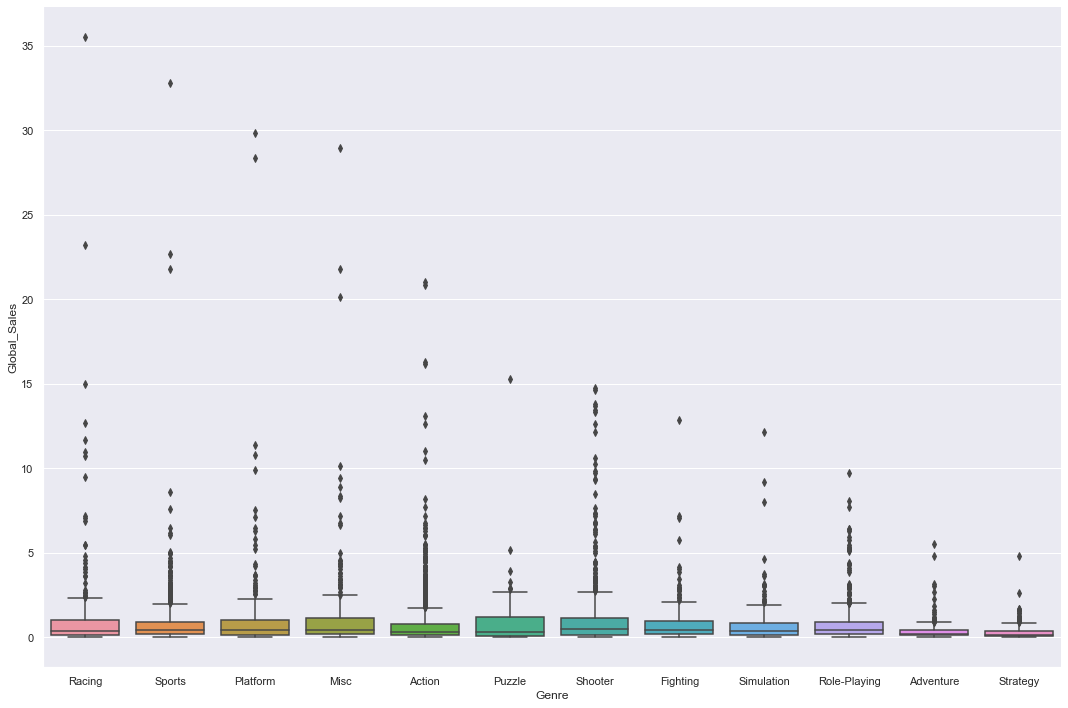

In [11]:
sb.catplot(x="Genre", y="Global_Sales", kind="box",height=10, aspect=1.5,data=mainData)

Check relation of Year of Release and Global Sales

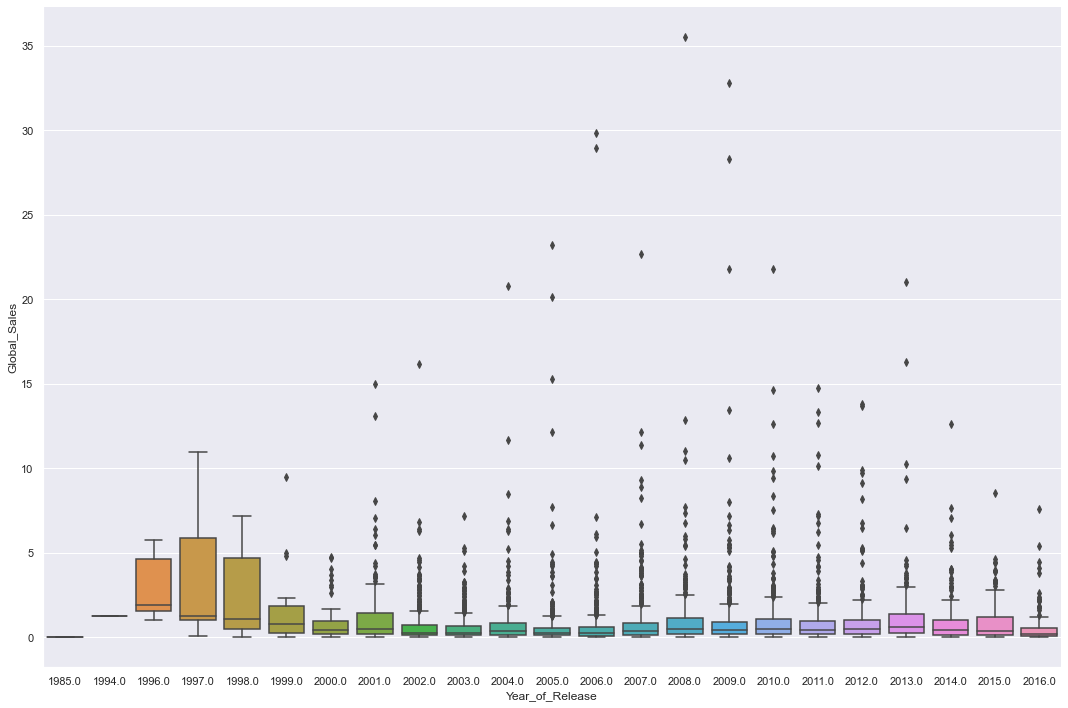

In [12]:
sb.catplot(x="Year_of_Release", y="Global_Sales", kind="box",height=10, aspect=1.5,data=mainData)

Check relation of Rating and Global Sales

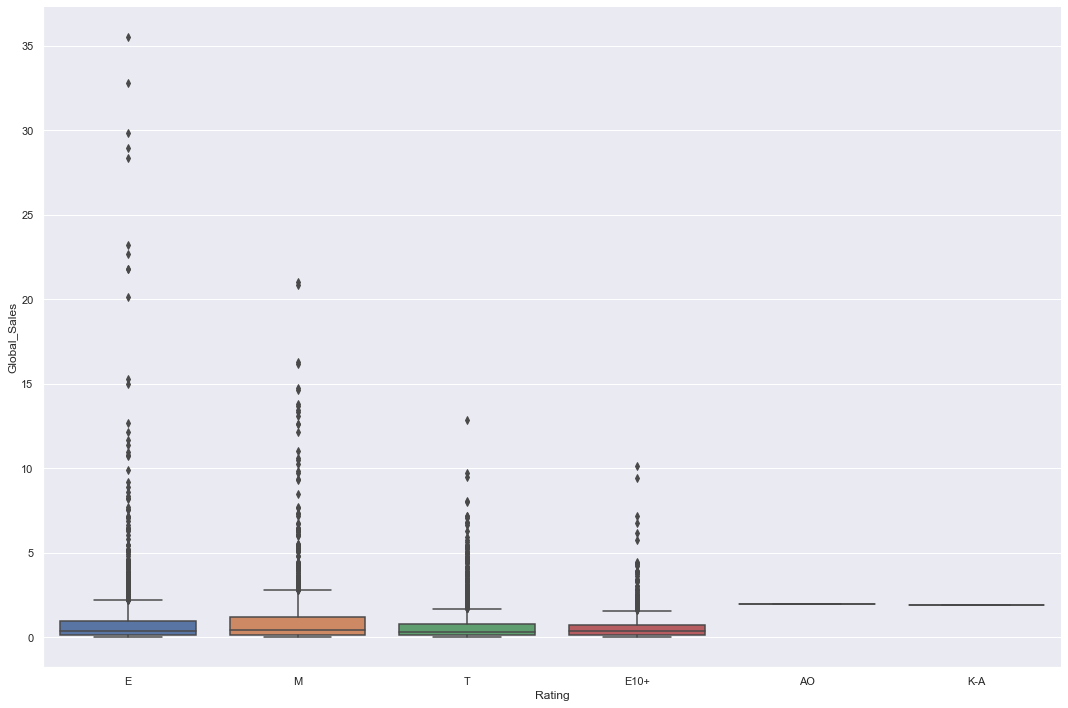

In [13]:
sb.catplot(x="Rating", y="Global_Sales", kind="box",height=10, aspect=1.5,data=mainData)

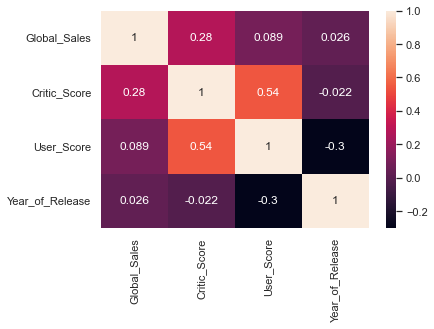

In [14]:
NumCorr = mainData[['Global_Sales','Critic_Score','User_Score']]
Critic_Scores = pd.DataFrame(mainData['Critic_Score'])
User_Scores = pd.DataFrame(mainData['User_Score'])
Global_Sales = pd.DataFrame(mainData['Global_Sales'])
Year_Release = pd.DataFrame(mainData['Year_of_Release'])
NumCorr = mainData[['Global_Sales','Critic_Score','User_Score','Year_of_Release']]
dataplot = sb.heatmap(NumCorr.corr(), annot=True)